In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

## Dataset importing and cleaning

In [97]:
df_dict = {}

def org_columns(name):
    
    df = pd.read_csv(name + '.csv', header = [0, 1])
    
    cols_index = pd.MultiIndex.from_tuples(df.columns)
    
    level_0 = cols_index.get_level_values(0).values
    level_1 = cols_index.get_level_values(1).values    
                     
    for i in range(len(level_0)):
        if i == 0:
            level_0[i] = 'Team'
        elif i < 10:
            level_0[i] = 'Total'
        elif i < 19:
            level_0[i] = 'Home'
        else:
            level_0[i] = 'Away'
            
    new_columns = list(zip(level_0, level_1))
    df.columns = pd.MultiIndex.from_tuples(new_columns)
    
    df_dict[name] = df
    
    return df

seriea = org_columns('italy')
bundesliga = org_columns('germany')
epl = org_columns('england')
laliga = org_columns('spain')
ligue = org_columns('france')

Goals :

1. Comapare the goals scored and conceded in the top 5 Leagues. (Bar plot)
2. Compare the goals scored by each team vs the ranking in table (Scatter)
3. Compare GD Vs ranking in the table (Scatter)

## Getting and Visualizing data

In [139]:
#Goal 1
goals_sco = {}

for league in df_dict.keys():
    df = df_dict[league]
    gs = df['Total', 'G'].sum()
    
    goals_sco[league] = gs
    
goals = pd.Series(goals_sco)

<IPython.core.display.Javascript object>


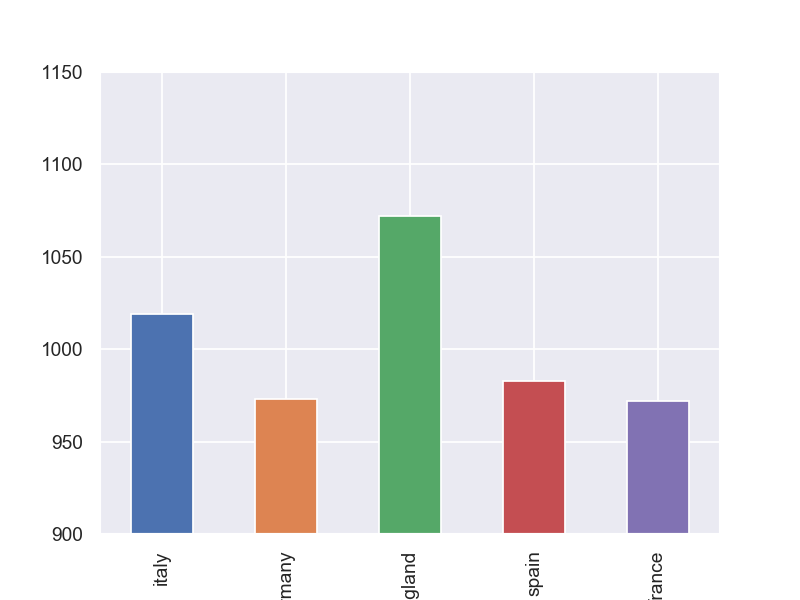

(900, 1150)

In [144]:
#Visualization

sns.set()

goals.plot.bar()
ax = plt.gca()
ax.set_ylim([900, 1150])

In [ ]:
#Goal 2